# **Diabetes Outcome Correlation Study**

## Objectives

* In this Notebook we will be investigating and determining how the variables in the dataset correlate to the 'Outcome' label that identifies whether a subject is diabetic or non-diabetic.

* We will be answering **business requirement 1** 
    * *The client is interested in discovering how various biomarkers in female patients correlate between those with diabetes and without diabetes. The client expects to better understand this by reviewing data visualizations of the biomarker variables.*

## Inputs

* inputs/datasets/raw/diabetes.csv

## Outputs

* Data visualisation will be used to answer business requirement 1, showing correlations between feature sets and Outcome label for use later on within a streamlit dashboard.

## Additional Comments

* This notebook falls under the CRISP-DM of Data Understanding


---

# Change working directory

* As the notebooks are stored in the subfolder 'jupyter_notebooks' we therefore, when running the notebook in the editor, need to change the working directory.

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/pp5-diabetes-prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/pp5-diabetes-prediction'

---

# Importing the Libraries

* Here we will import the dependencies used during the Correlation Study phase.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Dataset

* We will begin by loading the diabetes dataset.
* A Pandas dataframe is declared using the diabetes dataset using `read_csv()`
* The first five rows will be displayed using `head()`

In [5]:
df = pd.read_csv(f"outputs/datasets/collection/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

## Data Exploration

* We will now perform a Correlation Study using Exploratory Data Analysis (EDA).
* First lets get a more in-depth look at our dataset using a Profile Report from the pandas library.

*Bug Fix: ipywidgets is required to install before calling ProfileReport as when trying to use Pandas Profile a ModuleNotFoundError: No module named 'ipywidgets' is presented. [Source for fix: stackoverflow](https://stackoverflow.com/questions/34364681/no-module-named-ipywidgets-error-when-running-ipyhon-widgets).* 

In [8]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [9]:
from pandas_profiling import ProfileReport

profile_pandas = ProfileReport(df=df, minimal=True)
profile_pandas.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* From running the pandas profilling report we can see what we believed to be the case previously. That there were zero values amongst the feature sets when clicking on the alerts tab.

* These zero values will either need to be removed from the dataset or replaced by imputing with a median value. As the dataset is already small, imputing will be opted for in the Data Cleaning stage later on.

* In order to support the visualisation for how many zeros are contained in each column we will make use of exploratory data analysis in the form of a violin plot along with a count to supplement the visual with an exact figure

##### Violin plot and count of zeros for Pregnancies

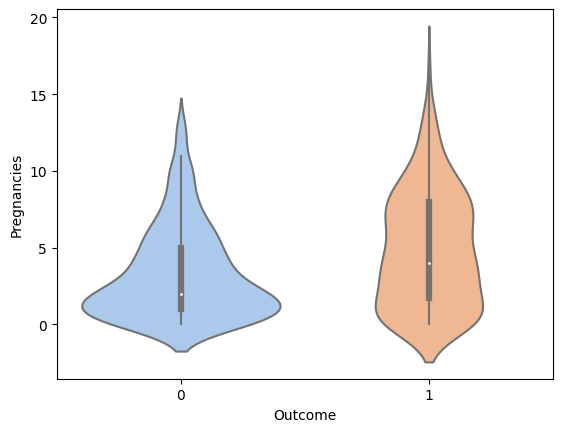

Total count of Zero: 111


In [10]:
%matplotlib inline

sns.violinplot(x='Outcome', y='Pregnancies', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.Pregnancies[df.Pregnancies==0].count())


* From this we can observe that pregnancies were higher in diabetic subjects compared to that of non-diabetics. With a total count of 111 zeros. No further cleaning will need to be done with this data as it is not an abnormal occurance.

##### Violin plot and count of zeros for Glucose

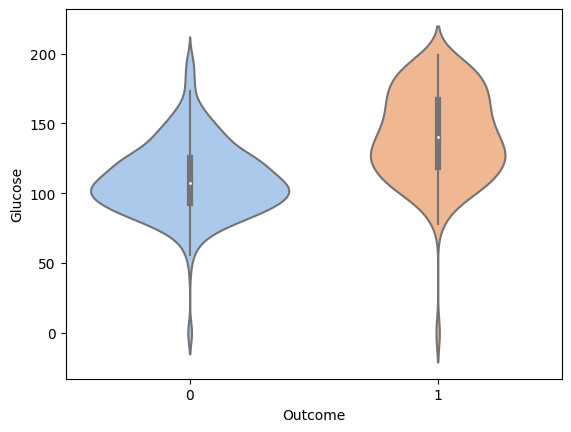

Total count of Zero: 5


In [11]:
sns.violinplot(x='Outcome', y='Glucose', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.Glucose[df.Glucose==0].count())

* From this we can see that there was a small number of zero values encountered however this would be deemed as abnormal from a biological perspective and would need to be imputed with a median value during the Data Cleaning phase ready for training the machine learning model.

##### Violin plot and count of zeros for BloodPressure

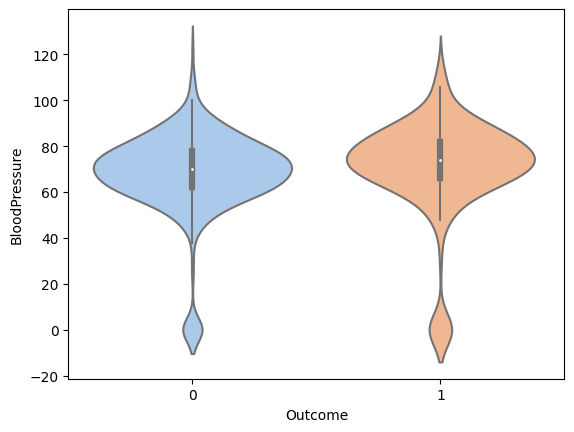

Total count of Zero: 35


In [12]:
sns.violinplot(x='Outcome', y='BloodPressure', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.BloodPressure[df.BloodPressure==0].count())

* From this we can see the lower portion of the violin plot gives us an indication of 0 values within this feature for both diabetics and non-diabetics with the total count being 35 zero values. This would be deemed as abnormal from a biological perspective and would need to be imputed with a median value during the Data Cleaning phase ready for training the machine learning model.

##### Violin plot and count of zeros for SkinThickness

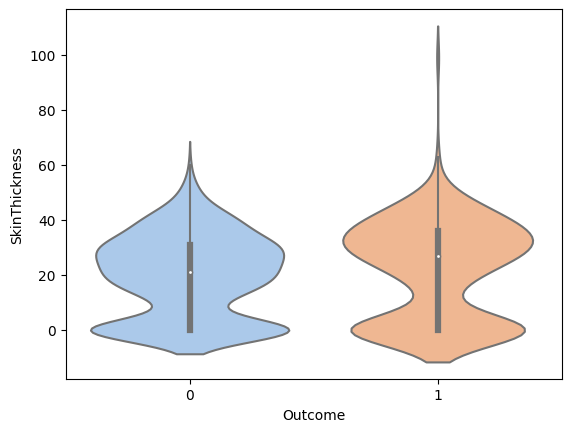

Total count of Zero: 227


In [13]:
sns.violinplot(x='Outcome', y='SkinThickness', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.SkinThickness[df.SkinThickness==0].count())

* Here we observe the same as the previous variable where the data is positively skeweed with 29.6% of zero values bringing a total count of 227. This would be deemed as abnormal from a biological perspective and would need to be imputed with a median value during the Data Cleaning phase ready for training the machine learning model.

##### Violin plot and count of zeros for Insulin

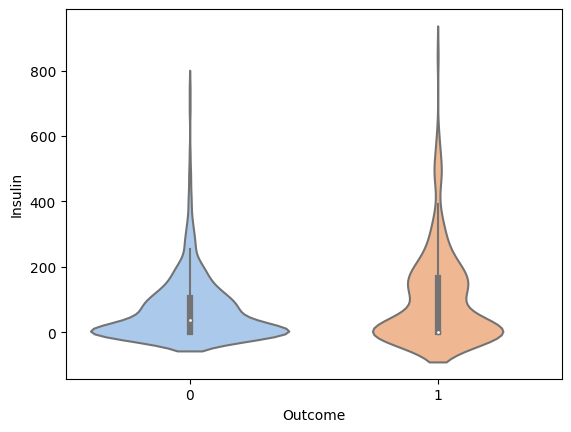

Total count of Zero: 374


In [14]:
sns.violinplot(x='Outcome', y='Insulin', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.Insulin[df.Insulin==0].count())

* Like the other variables Insulin is positively skewed and shows a large frequency of zero values. This would be deemed as abnormal from a biological perspective and would need to be imputed with a median value during the Data Cleaning phase ready for training the machine learning model.

##### Violin plot and count of zeros for BMI

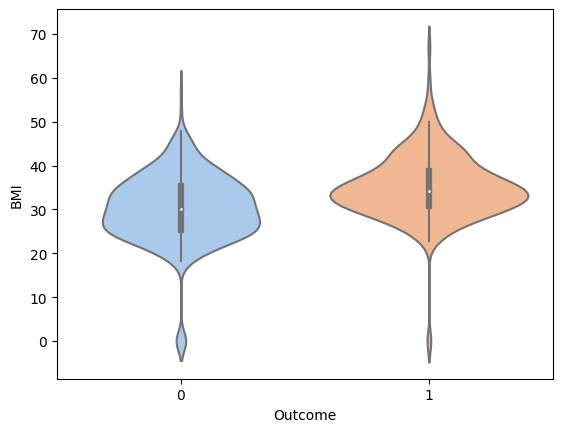

Total count of Zero: 11


In [15]:
sns.violinplot(x='Outcome', y='BMI', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.BMI[df.BMI==0].count())

* The BMI variable looks to be following normal distribution when comparing the mean and median values in the pandas profiling report. As we can see in the violin plot there is the occurrence of zero values again. There appears to be a larger value for BMI for those with diabetes compared to non-diabetics.

##### Violin plot and count of zeros for DiabetesPedigreeFunction

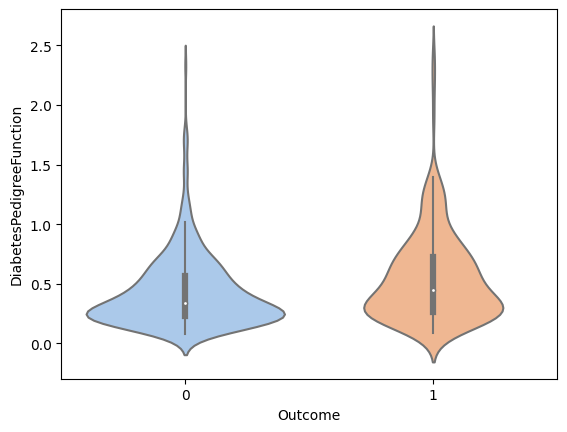

Total count of Zero: 0


In [16]:
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.DiabetesPedigreeFunction[df.DiabetesPedigreeFunction==0].count())

* From this violin plot we can see that there is a higher value for pedigree function in those with diabetes compared to those that are non-diabetic. This variable is also positively skewed with no zero values.

##### Violin plot and count of zeros for Age

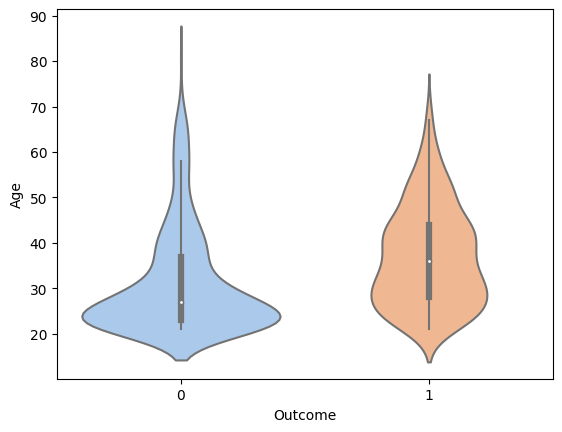

Total count of Zero: 0


In [17]:
sns.violinplot(x='Outcome', y='Age', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.Age[df.Age==0].count())

* From the pandas profiling report we can see that the variable of Age is positvely skewed with the average age of 33. There are no zero values shown in the violin plot due to the minimum age for the dataset being 21 and ranging through to 81. There are no abnormal values present.

* To further back up our analysis above and display the histograms produced in the pandas profiling report more clearly, we will produce a set of distribution plot graphs to visualise the data distributions.

<Figure size 1500x1200 with 0 Axes>

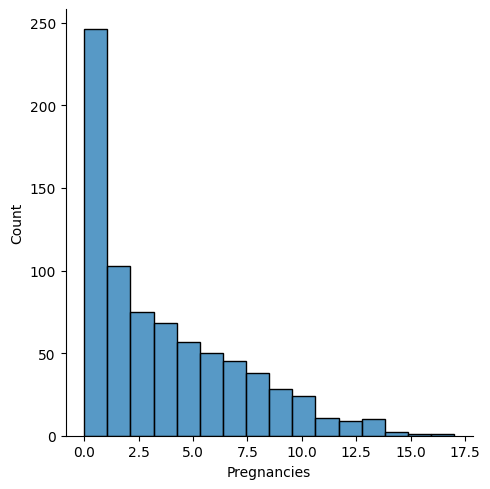

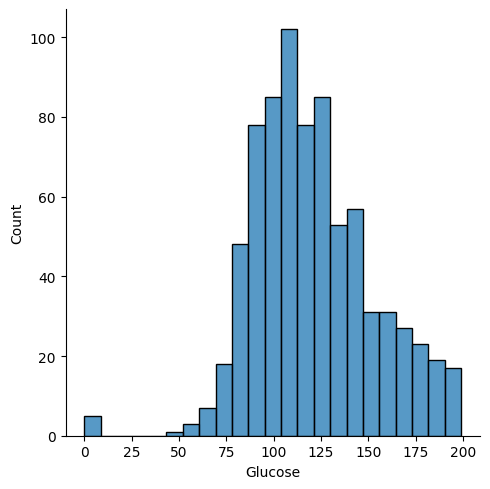

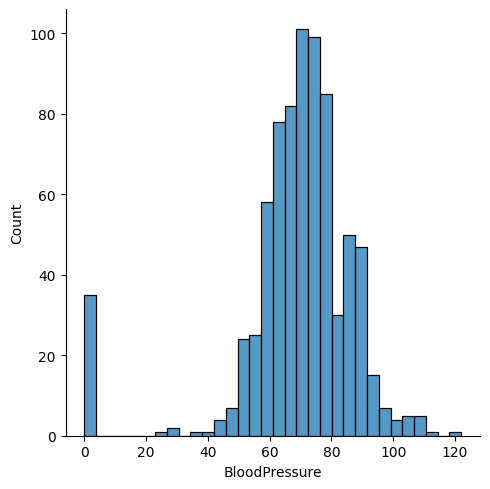

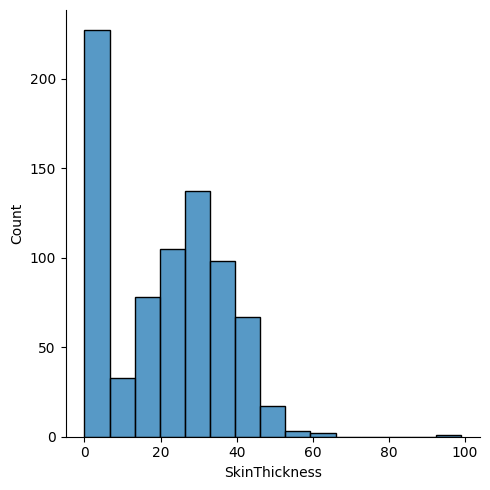

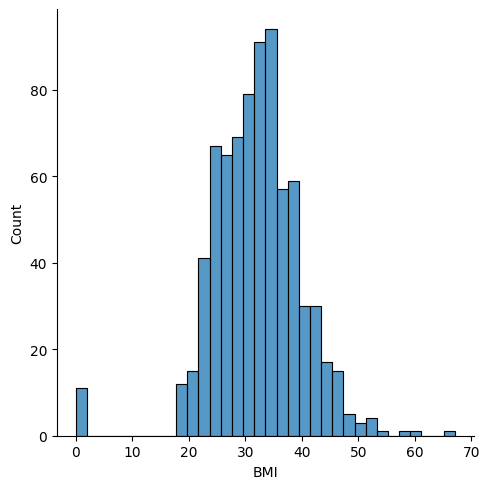

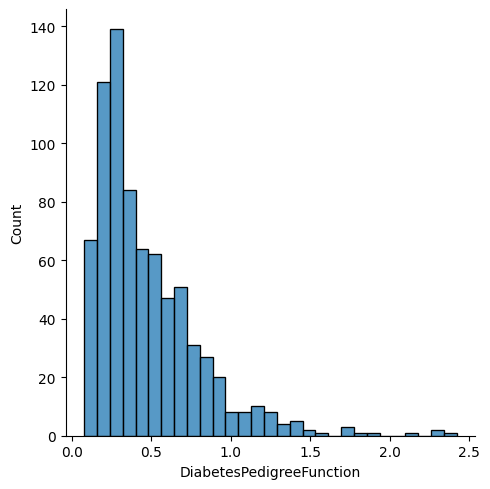

In [18]:
plt.figure(figsize=(15,12))
sns.displot(df.Pregnancies)
sns.displot(df.Glucose)
sns.displot(df.BloodPressure)
sns.displot(df.SkinThickness)
sns.displot(df.BMI)
sns.displot(df.DiabetesPedigreeFunction)
plt.show()

* We can also make use of `pairplot()` in order to see the distributions in relation to one another.

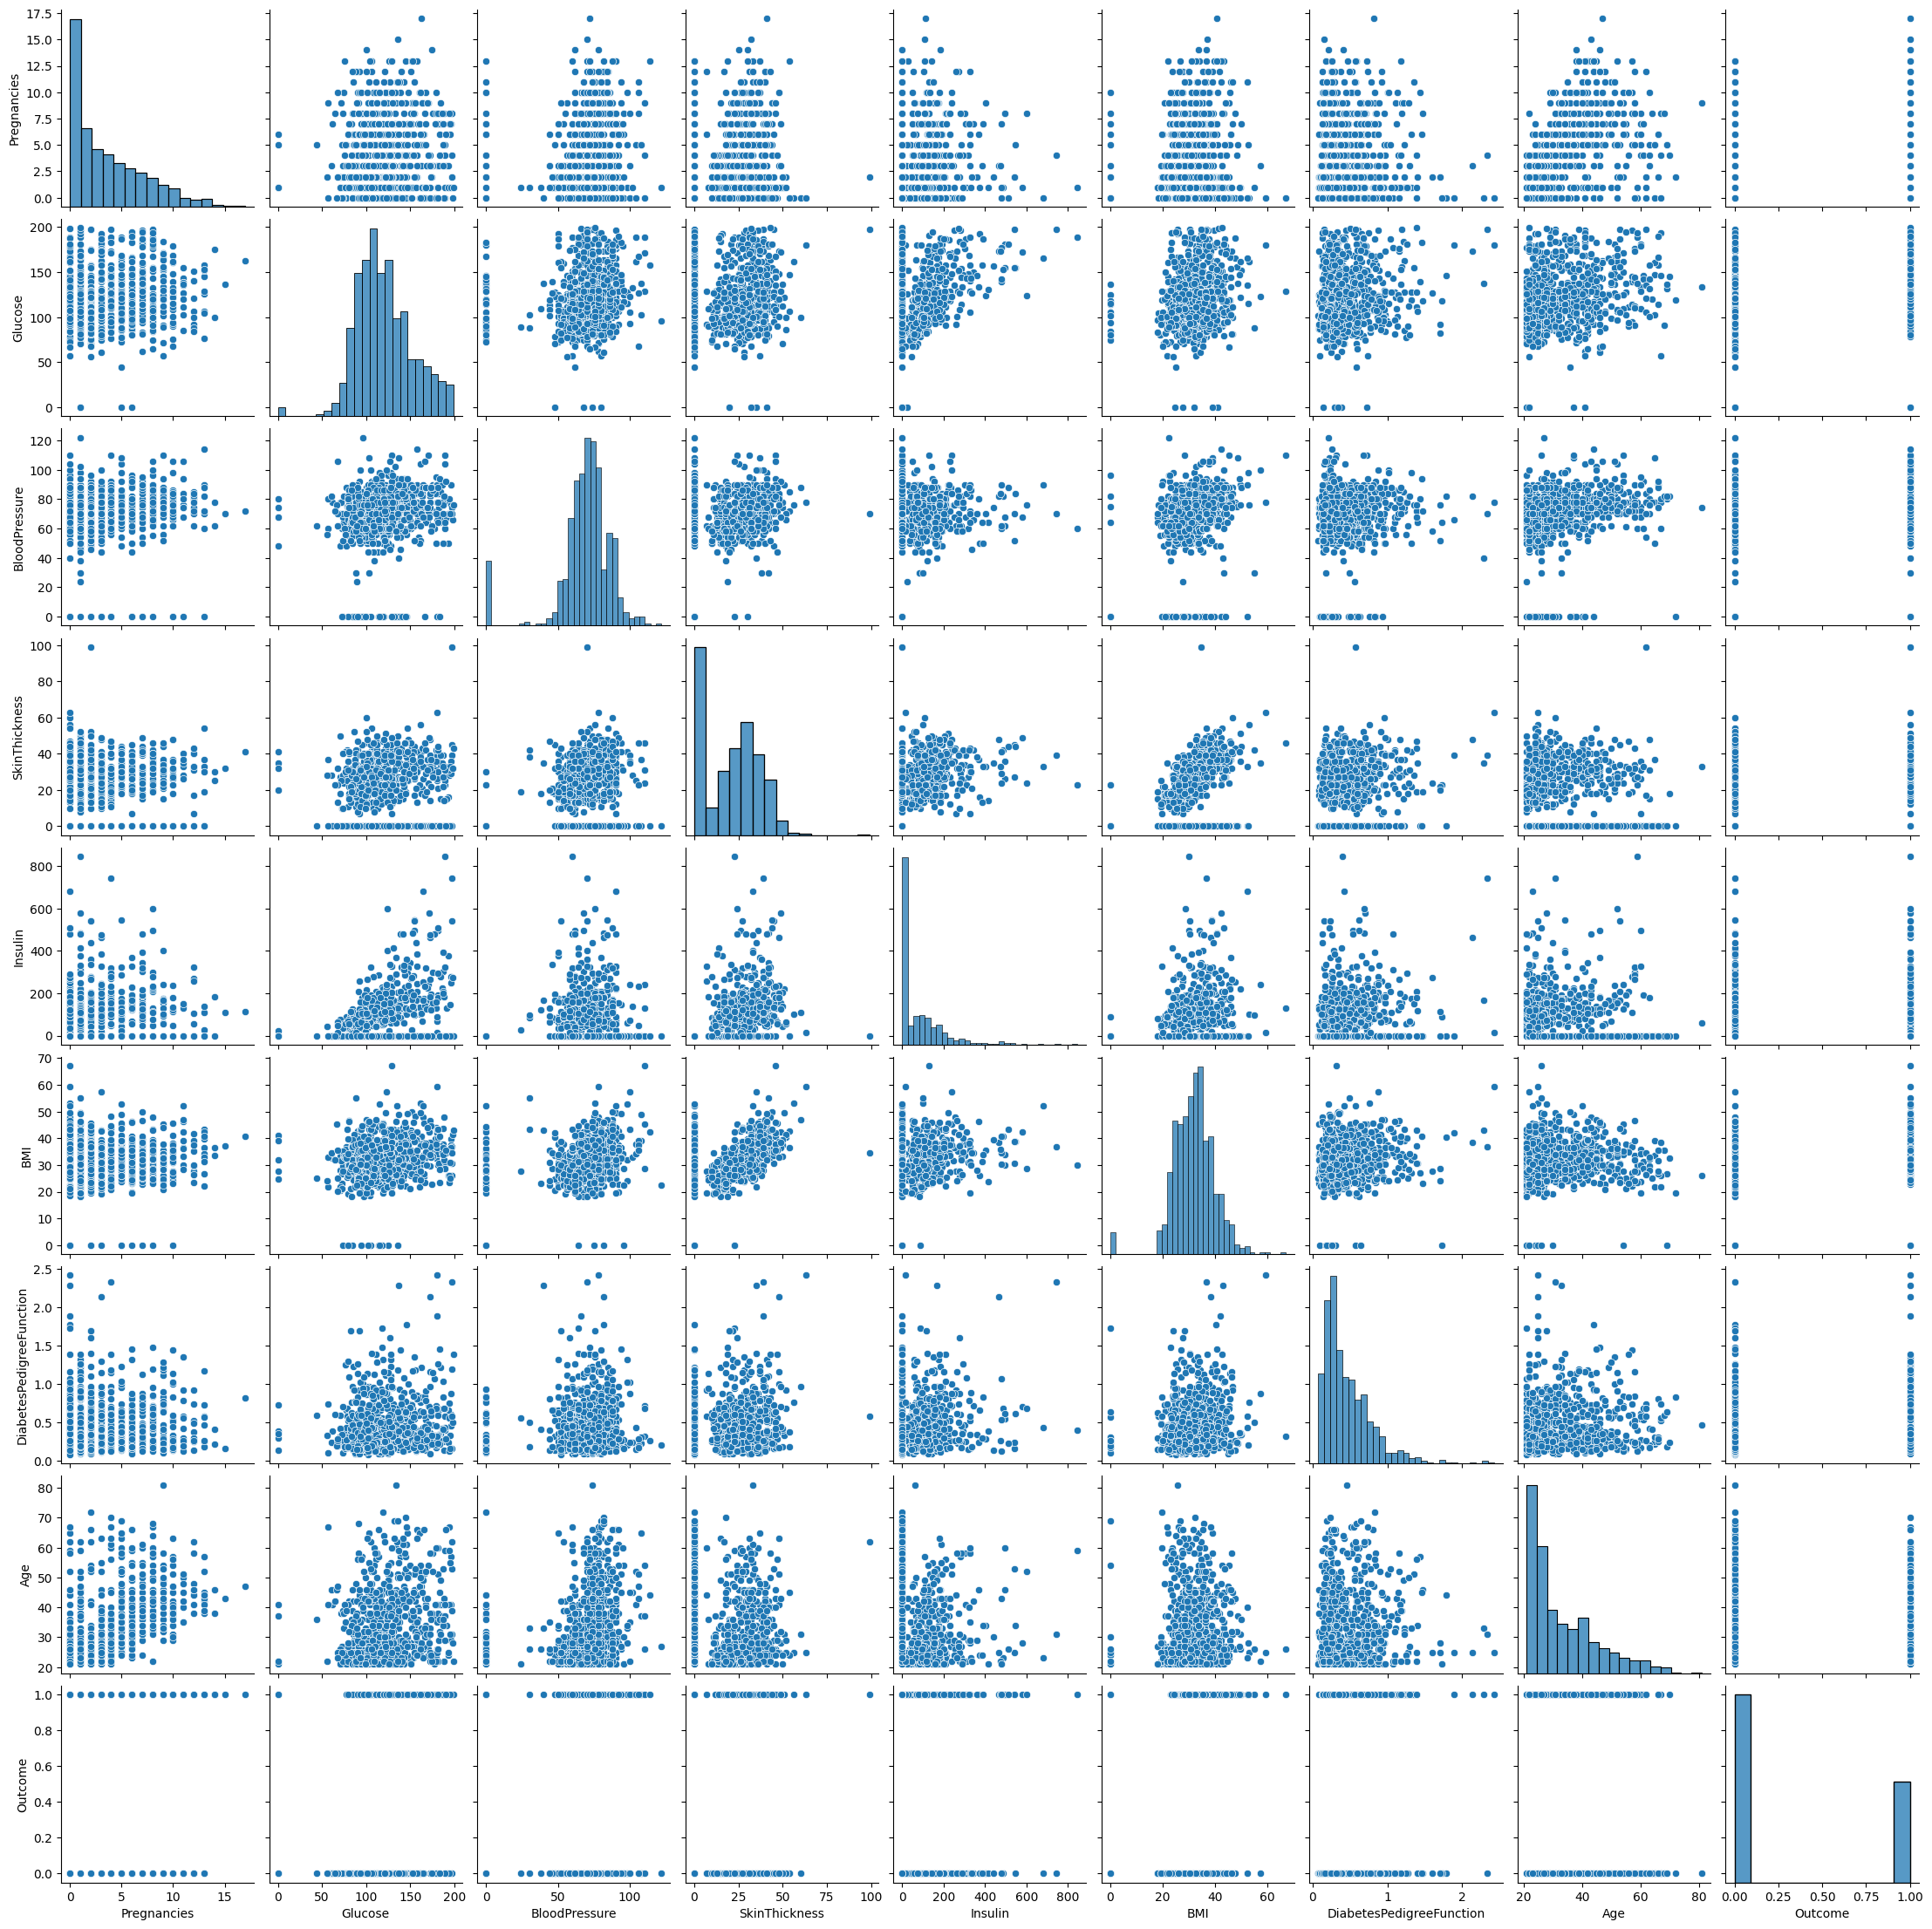

In [19]:
sns.pairplot(df)

### Correlation Matrix

* Next we will use a correlation matrix in order to better visualise the correlation between variables. 

In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

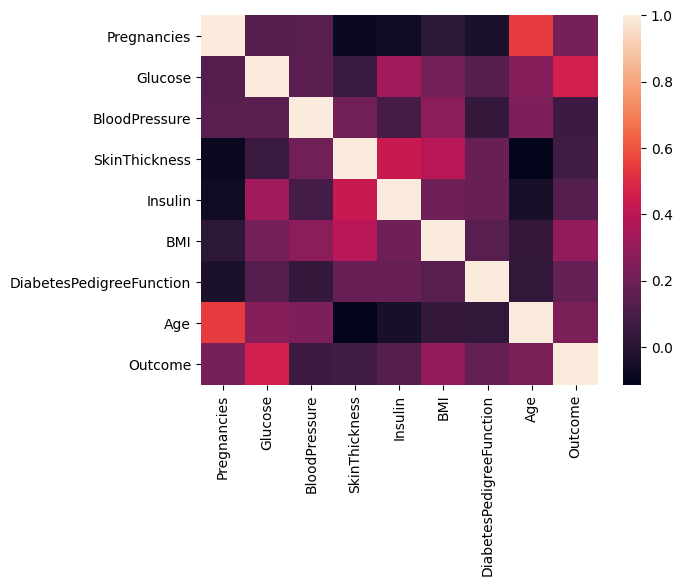

In [21]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,
    xticklabels=corr_matrix.columns,
    yticklabels=corr_matrix.columns)

* From this Correlation Matrix heatmap we can see that the lighter colours indicate there is a stronger correlation between variables than those which are darker. 

* As we can see above there is a strong correlation between Glucose and the Outcome variables suggesting that Glucose levels are an important variable for identifying diabetics and non-diabetics.

* There is also a significant correlation present between Age and Pregnancies as well as Insulin and SkinThickness

##### Order of importance

* From the above visuals we can get an idea for which variables have the largest impact on the outcome of being diabetic.

* We can show this order of importance by plotting on a graph to make it easier to view.

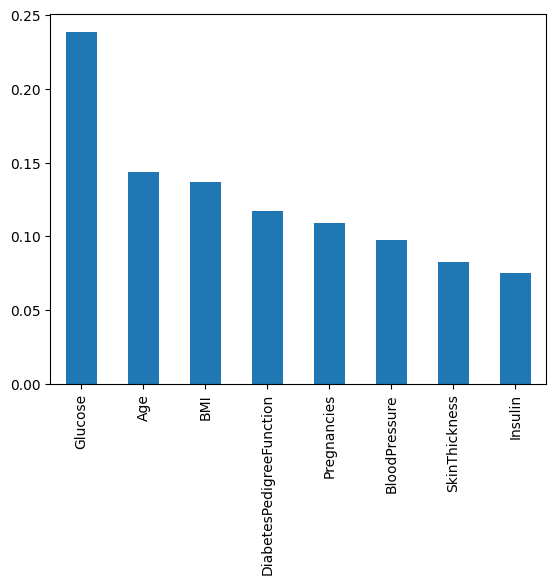

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

x=df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction', 'BloodPressure',]]
y=df.iloc[:,8]

model = ExtraTreesClassifier()
model.fit(x,y)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

* Plotting the above graph allows us to clearly see that Glucose has the largest importance on the outcome of the subject being diabetic followed by BMI and Age. This confirms what we see in the correlation matrix.

---

# Next Steps

* The data visualisation aspect has now been completed showing the correlation between variables which meet the first business requirement.

* The next stage will be moving on to addressing Business Requirement 2 - *The client requires a machine learning tool that their healthcare practitioners can use to identify whether a patient has diabetes.*

* Data cleaning will be taking part before moving onto building the machine learning pipeline.

* No files or modified data frames are to be pushed to the repository from this notebook.